# Importing the packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
# In order to save the plots of plotly
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


# Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Plot function

In [ ]:
import plotly.express as px

# returning the plot including the pattern of a specific zipcode
def plot_function(data, x_col, y_col, name):

  # Making the timely plot
  fig = go.Scatter(x=data[x_col] , y = data[y_col], name = name )

  # Showing the plot
  return fig

# Loading data

In [ ]:
# The name of the .csv files
File_names = ['acs2021_zip.csv', 'BLS_CPI.csv', 'BLS_ELECTRICITY.csv', 'BLS_GASOLINE.csv', 'CALFRESH_MEALS.csv',
              'FSD_FOOD.csv', 'SDFB_FOOD.csv', 'Unemployment_Wide (2).csv', 'ZILLOW_RENT.csv']

# The path to the directory
root_path = '<path to the root directory>'

## acs data

In [ ]:
# Loading acs data
acs_df = pd.read_csv(root_path + File_names[0])
acs_df

,Year,Zip Code,Population,Veteran Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other Race,...,Population in Poverty,Population with Disability,Senior Population (60y+),Households Receiving SNAP,Median Income,Youth Population,Unemployment,Food_Insecurity_Estimate,Food_Insecure_Population,LIHEAP Request
0,2021,91901,18367,1325,15133,224,319,539,94,759,...,2237,1841,NaN,301,105679,4039,2.618557,0.065963,1211.536009,2279.0
1,2021,91902,17759,1226,10689,409,17,2537,103,1248,...,1466,1889,NaN,130,112331,3129,3.641751,0.062769,1114.705974,2832.0
2,2021,91905,1616,52,817,19,266,3,5,62,...,509,318,NaN,85,0,193,3.689738,0.157117,253.901012,495.0
3,2021,91906,4547,221,3071,123,294,10,0,722,...,1692,537,NaN,156,49191,1502,5.681376,0.161349,733.653032,380.0
4,2021,91910,76291,4487,41200,2954,466,7499,182,8958,...,14471,8690,16538.0,2769,77005,16557,4.792216,0.100696,7682.181917,6036.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2021,92155,340,10,202,30,0,0,10,68,...,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN
110,2021,92161,0,0,0,0,0,0,0,0,...,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN
111,2021,92173,29634,668,17627,431,119,443,153,5099,...,9144,3151,NaN,1655,54003,7967,6.720634,0.127092,3766.231657,3759.0
112,2021,92179,4061,109,2254,1327,53,106,29,100,...,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN


## BLS_CPI data

In [ ]:
# Loading the consumer index data
bls_cpi_df = pd.read_csv(root_path + File_names[1])
bls_cpi_df

,Date,Consumer Price Index
0,1/1/2018,288.331000
1,2/1/2018,289.633525
2,3/1/2018,290.810000
3,4/1/2018,290.013656
4,5/1/2018,289.243000
...,...,...
64,5/1/2023,361.339000
65,6/1/2023,361.884295
66,7/1/2023,362.412000
67,8/1/2023,364.798500


## bls_electricity data

In [ ]:
# Loading the electricity data
bls_electricity_df = pd.read_csv(root_path + File_names[2])
bls_electricity_df

,Date,Electricity Prices
0,1/1/2018,0.274
1,2/1/2018,0.274
2,3/1/2018,0.274
3,4/1/2018,0.273
4,5/1/2018,0.273
...,...,...
64,5/1/2023,0.477
65,6/1/2023,0.475
66,7/1/2023,0.475
67,8/1/2023,0.475


## bls_gasoline data

In [ ]:
# Loading gasoline data
bls_gasoline_df = pd.read_csv(root_path + File_names[3])
bls_gasoline_df

,Date,Gas Prices
0,1/1/2018,3.181
1,2/1/2018,3.376
2,3/1/2018,3.394
3,4/1/2018,3.540
4,5/1/2018,3.669
...,...,...
64,5/1/2023,4.824
65,6/1/2023,4.874
66,7/1/2023,4.923
67,8/1/2023,5.216


## Calfresh_meals data

In [ ]:
# Loading the meals data
calfresh_meal_df = pd.read_csv(root_path + File_names[4])
calfresh_meal_df

,Date,ZipCode,CalfreshDollars,meal_cost,CalfreshMeals
0,1/1/2020,91901,101567.00,3.473000,29244.742334
1,2/1/2020,91901,103182.00,3.481491,29637.300872
2,3/1/2020,91901,111982.00,3.494707,32043.315505
3,4/1/2020,91901,215626.00,3.511883,61398.975260
4,5/1/2020,91901,225830.00,3.532253,63933.701774
...,...,...,...,...,...
7039,4/1/2023,92198,5568.00,4.310159,1291.831785
7040,5/1/2023,92198,5909.00,4.329682,1364.765348
7041,6/1/2023,92198,5939.00,4.336216,1369.627364
7042,7/1/2023,92198,6125.01,4.342539,1410.467449


## Fsd_food data

In [ ]:
# Food data
fsd_food_df = pd.read_csv(root_path + File_names[5])
fsd_food_df

,Date,91901,91902,91903,91905,91906,91908,91909,91910,91911,...,92191,92192,92193,92194,92195,92196,92197,92198,92199,FSD Total
0,1/1/2018,7884.0,0,0,6140.0,9659.0,4279.0,0,45721.00000,12312.00000,...,0,0,0,0,0,0,0,0,0,2.074498e+06
1,2/1/2018,10558.0,0,0,7904.0,13806.0,4128.0,0,33260.00000,13827.00000,...,0,0,0,0,0,0,0,0,0,1.998585e+06
2,3/1/2018,10642.0,0,0,6710.0,13241.0,4069.0,0,32151.00000,64471.00000,...,0,0,0,0,0,0,0,0,0,2.512884e+06
3,4/1/2018,12192.0,0,0,7764.0,9326.0,4004.0,0,49163.00000,40899.00000,...,0,0,0,0,0,0,0,0,0,2.227407e+06
4,5/1/2018,10370.0,0,0,10043.0,15057.0,4733.5,0,65172.00000,21268.00000,...,0,0,0,0,0,0,0,0,0,2.430279e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5/1/2023,27788.0,0,0,5273.0,17752.0,2065.0,0,78506.50000,215527.34550,...,0,0,0,0,0,0,0,0,0,2.850231e+06
65,6/1/2023,17225.0,0,0,7831.0,15654.0,3511.0,0,74236.00000,159074.70240,...,0,0,0,0,0,0,0,0,0,2.969680e+06
66,7/1/2023,20383.0,0,0,3484.0,16089.0,3076.0,0,65178.96511,92706.19185,...,0,0,0,0,0,0,0,0,0,2.424335e+06
67,8/1/2023,21097.0,0,0,5619.0,12620.0,3324.0,0,78436.00000,108226.68340,...,0,0,0,0,0,0,0,0,0,2.689486e+06


## Sdfb_food data

In [ ]:
# Food data
sdfb_food_df = pd.read_csv(root_path + File_names[6])
sdfb_food_df

,Date,91901,91902,91903,91905,91906,91908,91909,91910,91911,...,92191,92192,92193,92194,92195,92196,92197,92198,92199,SDFB Total
0,1/1/2018,0,0,0,4619.972,16624.070,0,0,110447.215,72343.656,...,0,0,0,0,0,0,0,0,0,2446364.869
1,2/1/2018,0,0,0,5558.311,3405.981,0,0,111122.089,72614.981,...,0,0,0,0,0,0,0,0,0,2241665.465
2,3/1/2018,0,0,0,5060.525,5054.250,0,0,98236.059,76254.693,...,0,0,0,0,0,0,0,0,0,2311746.285
3,4/1/2018,0,0,0,5497.400,3390.635,0,0,106245.510,52433.375,...,0,0,0,0,0,0,0,0,0,2165784.151
4,5/1/2018,0,0,0,5272.998,3878.308,0,0,96114.690,85850.613,...,0,0,0,0,0,0,0,0,0,2424287.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5/1/2023,0,0,0,12384.510,2619.000,0,0,170176.147,116821.673,...,0,0,0,0,0,0,0,0,0,4492249.190
65,6/1/2023,0,0,0,14664.895,4309.000,0,0,157279.388,125046.955,...,0,0,0,0,0,0,0,0,0,3707817.120
66,7/1/2023,0,0,0,12029.112,15805.375,0,0,151593.710,85468.013,...,0,0,0,0,0,0,0,0,0,3840546.300
67,8/1/2023,0,0,0,10948.358,17196.000,0,0,191367.355,108137.017,...,0,0,0,0,0,0,0,0,0,4359642.063


## Unemployment_Wide data

In [ ]:
# Unemployment data
unemployment_wide_df = pd.read_csv(root_path + File_names[7])
unemployment_wide_df

,Date,County (EDD Estimates),91901_ Alpine,91902_ Bonita,91905_ Boulevard,91906_ Campo,91910_ Chula Vista N,91911_ Chula Vista S,91913_ Chula Vista - Eastlake,91914_ Chula Vista NE,...,92124_ Tierrasanta,92126_ Mira Mesa,92127_ Rancho Bernardo W,92128_ Rancho Bernardo E,92129_ Penasquitos,92130_ Carmel Valley,92131_ Scripps Ranch,92139_ Paradise Hills,92154_ Nestor,92173_ San Ysidro
0,Pre-Covid,3.2,2.079602,3.201709,3.213715,5.670375,4.281131,5.198517,3.682860,1.914614,...,2.796819,2.537381,1.729272,2.631431,2.507817,2.695010,2.243566,4.523580,4.596349,6.334217
1,20-Mar,4.7,3.534753,4.674549,4.696440,7.112666,5.833214,6.806865,5.111398,3.324868,...,4.189319,3.949295,3.009461,3.942289,3.806004,4.004637,3.549987,6.072737,6.230156,8.054353
2,20-Apr,15.7,14.778581,15.515390,17.697817,18.234205,17.559023,18.806985,15.410636,14.221384,...,13.790731,12.944117,10.919718,12.139797,12.095743,11.949238,11.411132,17.811213,18.358662,20.490724
3,20-May,16.2,15.208682,16.111880,18.153816,18.878790,17.989595,19.081145,16.043443,14.954966,...,14.643730,13.583853,11.954178,13.084871,13.129773,13.019559,12.422611,18.155228,18.521813,20.499978
4,20-Jun,13.6,12.556023,13.532897,14.778134,16.253584,15.004931,15.925722,13.561979,12.388346,...,12.625994,11.728084,10.576738,11.543411,11.604651,11.678353,11.054105,15.145338,15.301940,17.082548
5,20-Jul,12.7,11.773957,12.805785,13.632647,15.362776,14.070964,14.827660,12.737206,11.711740,...,11.876204,10.674619,9.874354,10.849742,10.988606,10.893781,10.324031,14.031589,14.126239,15.687446
6,20-Aug,10.6,9.809887,10.554491,11.950937,13.640532,11.885804,12.689460,10.437613,9.424307,...,9.695123,8.558209,7.708605,8.672446,8.793635,8.786944,8.130132,11.899254,11.977729,13.623478
7,20-Sep,9.5,8.686312,9.426426,10.749148,12.445125,10.730306,11.556548,9.343961,8.249795,...,8.631926,7.650883,6.810982,7.766412,7.831275,7.895588,7.226592,10.759668,10.873631,12.552757
8,20-Oct,8.4,7.526266,8.299917,9.655413,11.304038,9.624278,10.487391,8.321571,7.105566,...,7.519162,6.698808,5.792867,6.740465,6.780199,6.819546,6.184099,9.749731,9.824695,11.526958
9,20-Nov,8.1,7.161965,7.960996,9.304815,10.905100,9.241453,10.087736,7.967078,6.720525,...,7.220323,6.496126,5.574156,6.496197,6.520066,6.581728,5.937061,9.420423,9.436894,11.102196


## zillow_rent data

In [ ]:
# Loading house price data
zillow_rent_df = pd.read_csv(root_path + File_names[8])
zillow_rent_df

,Date,Rent Prices
0,1/31/2015,1769.631368
1,2/28/2015,1779.981704
2,3/31/2015,1791.053429
3,4/30/2015,1792.904086
4,5/31/2015,1804.561293
...,...,...
100,5/31/2023,3105.492879
101,6/30/2023,3134.441018
102,7/31/2023,3154.579092
103,8/31/2023,3162.891448


# Population vs Poverty

We will check the level of poverty with respect to population of each zipcode

In [ ]:
# Create a line plot with two lines
fig = go.Figure()

# Plotting the population in poverty
fig.add_trace(go.Bar(x=acs_df['Zip Code'].astype(str), y=acs_df['Population in Poverty'], name = 'In Poverty'))

# Plotting the population
fig.add_trace(go.Bar(x=acs_df['Zip Code'].astype(str), y=acs_df['Population'], name = 'Population'))

# Update layout with title and axis labels
fig.update_layout(title='Population vs poverty', xaxis_title='Zip code', yaxis_title='Population/Poverty', barmode='stack')

# Show the plot
fig.show()

## Top 10 zipcodes with the highest poverty percentage

In [ ]:
# Filtering out the population and the population in poverty columns
Poverty_percentage_df = acs_df[['Zip Code', 'Population', 'Population in Poverty']].copy()

# Computing the poverty percentage per each zipcode
Poverty_percentage_df['Poverty_percentage'] = (Poverty_percentage_df['Population in Poverty'] / Poverty_percentage_df['Population']).round(2)*100

# Sorting out the records based on the highest poverty percentage
Poverty_percentage_df = Poverty_percentage_df.sort_values('Poverty_percentage', ascending = False, )

#Create a bar plot
fig = px.bar(x=Poverty_percentage_df['Zip Code'][:10].astype(str), y=Poverty_percentage_df['Poverty_percentage'][:10], title='Top 10 zipcodes with highest poverty percentage', labels={'x': 'Zip codes', 'y': 'poverty percentage'}, )

# Saving the plot
fig.write_image("Top 10 zipcodes - highest poverty percentage.png")

# Show the plot
fig.show()


# Consumer index vs Electricity price

Here we will plot the pattern of consumer index with respect to the electricity price

In [ ]:
# Joining together the data for the index and the electricity price
Joined_df = pd.merge(bls_cpi_df, bls_electricity_df, on = 'Date')

# Scaling the data to be in the range [0, 1]
scaler = MinMaxScaler()
Joined_df[['Consumer Price Index', 'Electricity Prices']] = scaler.fit_transform(Joined_df[['Consumer Price Index', 'Electricity Prices']])

# Creating the figure
fig = go.Figure()

# Plotting the consumer price index
fig.add_trace(go.Scatter(x=Joined_df['Date'] , y=Joined_df['Consumer Price Index'], name='Consumer Index'))

# Plotting the electricity price
fig.add_trace(go.Scatter(x=Joined_df['Date'], y=Joined_df['Electricity Prices'], name='Electricity Price'))

# Updating the layout
fig.update_layout(title='Consumer Index vs Electricity Price', xaxis_title='Date', yaxis_title='Scale')

# Show the plot
fig.show()

# Consumer index vs Gasoline price

Plotting the pattern for the consumer index and gasoline price

In [ ]:
# Joining together the data for the index and the electricity price
Joined_df = pd.merge(bls_cpi_df, bls_gasoline_df, on = 'Date')

# Scaling the data to be in the range [0, 1]
scaler = MinMaxScaler()

Joined_df[['Consumer Price Index', 'Gas Prices']] = scaler.fit_transform(Joined_df[['Consumer Price Index', 'Gas Prices']])

# Create a line plot with two lines
fig = go.Figure()

# Plotting the consumer price index
fig.add_trace(go.Scatter(x=Joined_df['Date'] , y=Joined_df['Consumer Price Index'], name='Consumer Index'))

# Plotting the gas price
fig.add_trace(go.Scatter(x=Joined_df['Date'], y=Joined_df['Gas Prices'], name='Gas price'))

# Updating the layouts
fig.update_layout(title='Consumer Index vs Gasoline price', xaxis_title='Date', yaxis_title='Scale')

# Show the plot
fig.show()

# Analysis of food weight

## Analysis of total food weights

In this section, we are going to plot the top 10 zipcodes that had the highest food weights in the past 3 years.

In [ ]:
# Filtering out the zipcodes
# Omitting the date and SDFB Total columns
Zipcodes = sdfb_food_df.columns[1:-1]

# Summing up the food weights for each zipcode in the past 3 years
Total_weights = sdfb_food_df[Zipcodes].sum(axis = 0)

# Forming a dataframe with the data
Zipcodes_total_weights_df = pd.DataFrame(Total_weights).reset_index()

# Renaming the columns
Zipcodes_total_weights_df.columns = ['Zip code', 'Total_food_weights']

# Sorting out the dataframe based on the total food weights
# and take out the top 10 records
Zipcodes_total_weights_df = Zipcodes_total_weights_df.sort_values('Total_food_weights', ascending = False)[:10]

#Create a bar plot
fig = px.bar(x=Zipcodes_total_weights_df['Zip code'], y=Zipcodes_total_weights_df['Total_food_weights'], title='Top 10 zipcodes with highest food weights', labels={'x': 'Zip codes', 'y': 'Food weights'}, )

fig.write_image("Top 10 zipcodes - highest food weights.png")

# Show the plot
fig.show()

## Analysis on the average food weight

In this section, we are going to identify which zipcodes had the highest average food weights per month in the past 3 years

In [ ]:
# Filtering out the zipcodes
# Omitting the date and SDFB Total columns
Zipcodes = sdfb_food_df.columns[1:-1]

# Computing the average food weight per month in the past 3 years
Average_mean = sdfb_food_df[Zipcodes].mean()

# Forming a dataframe with the data
Zipcodes_Average_mean_df = pd.DataFrame(Average_mean).reset_index()

# Renaming the columns
Zipcodes_Average_mean_df.columns = ['Zip code', 'Average_food_weigth']

# Sorting out the dataframe based on the average food weight
# and take out the top 10 records
Zipcodes_Average_mean_df = Zipcodes_Average_mean_df.sort_values('Average_food_weigth', ascending = False)[:10]

#Create a bar plot
fig = px.bar(x=Zipcodes_Average_mean_df['Zip code'], y=Zipcodes_Average_mean_df['Average_food_weigth'], title='Top 10 zipcodes with highest average food weight', labels={'x': 'Zip codes', 'y': 'Average food weight'}, )

fig.write_image("Top 10 zipcodes - highest average food weight.png")

# Show the plot
fig.show()

## Identifying 0 valued zipcodes

In this section we are going to check which zipcodes have 0 values for all of the dates

In [ ]:
# Filtering out the zipcodes
# Omitting the date and SDFB Total columns
Zipcodes = sdfb_food_df.columns[1:-1]

# Computing the sum of food weight in the past 3 years
Total_food_weight = sdfb_food_df[Zipcodes].sum(axis = 0 )

# Forming a dataframe with the data
Zipcodes_total_food_weight = pd.DataFrame(Total_food_weight).reset_index()

# Renaming the columns
Zipcodes_total_food_weight.columns = ['Zip code', 'Total_food_weight']

# The zipcodes that have 0 for all of the dates
Zero_zipcodes = list(Zipcodes_total_food_weight[Zipcodes_total_food_weight['Total_food_weight'] == 0 ]['Zip code'])

print(Zero_zipcodes)

['91901', '91902', '91903', '91908', '91909', '91914', '91915', '91916', '91921', '91931', '91933', '91943', '91946', '91947', '91948', '91951', '91962', '91976', '91979', '91980', '91987', '91990', '92003', '92013', '92014', '92018', '92022', '92023', '92030', '92033', '92038', '92039', '92046', '92051', '92052', '92055', '92060', '92067', '92068', '92070', '92072', '92074', '92079', '92085', '92088', '92090', '92091', '92092', '92112', '92122', '92132', '92133', '92134', '92135', '92136', '92137', '92138', '92140', '92142', '92143', '92145', '92147', '92149', '92150', '92152', '92153', '92155', '92158', '92159', '92160', '92161', '92162', '92163', '92164', '92165', '92166', '92168', '92169', '92170', '92171', '92172', '92174', '92175', '92176', '92177', '92178', '92179', '92184', '92186', '92187', '92190', '92191', '92192', '92193', '92194', '92195', '92196', '92197', '92198', '92199']


After having the zipcodes that they had 0 everywhere, we want to check if there is any entry in other zipcodes that contain null value

In [ ]:
# Filtering only the zipcodes columns names
Zipcodes = sdfb_food_df.columns[1:-1]

# Filtering out the data for zipcodes only
Zipcodes_data = sdfb_food_df[Zipcodes]

# Filtering out the zipdoes that are not all zeros
Non_zero_zipcodes = [zipcode for zipcode in Zipcodes_data.columns if zipcode not in Zero_zipcodes]

# Filtering out the records for the zipcodes that don't have 0 in all of the entries
Non_zero_zipcode_data = Zipcodes_data[Non_zero_zipcodes].copy()

# add the date and the total sdfb
Non_zero_zipcode_data[['Date', 'SDFB Total']] = sdfb_food_df[['Date', 'SDFB Total']]

# Showing the records
display(Non_zero_zipcode_data)

# Saving the dataframe as a .csv file
Non_zero_zipcode_data.to_csv('Non_zero_food_weight_zipcodes.csv')

,91905,91906,91910,91911,91912,91913,91917,91932,91934,91935,...,92127,92128,92129,92130,92131,92139,92154,92167,92173,92182
0,4619.972,16624.070,110447.215,72343.656,5315.981,4870.603,0.0,24338.190,4949.0,10232.527,...,0.000,0.000,4107.000,0.000,3079.50,3230.000,44399.160,0,85373.435,15776.000
1,5558.311,3405.981,111122.089,72614.981,7571.000,5407.570,0.0,27933.909,6481.0,6002.154,...,294.000,0.000,4386.500,0.000,2429.00,5031.000,42953.000,0,93079.266,19386.000
2,5060.525,5054.250,98236.059,76254.693,6975.000,4189.250,0.0,28621.375,6734.0,5608.000,...,875.000,0.000,3966.654,0.000,2342.00,760.000,50240.000,0,89843.757,11688.500
3,5497.400,3390.635,106245.510,52433.375,7388.000,4438.550,0.0,30223.050,5126.0,6245.250,...,722.000,0.000,2064.654,0.000,2454.50,5946.000,54029.000,0,99514.315,8830.000
4,5272.998,3878.308,96114.690,85850.613,7189.000,5756.855,0.0,31481.446,4700.0,6025.112,...,560.000,362.918,6386.981,0.000,3460.00,2752.000,47485.000,0,99595.918,2530.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,12384.510,2619.000,170176.147,116821.673,8376.000,3359.825,0.0,19429.036,5303.0,65656.440,...,1253.700,649.102,6722.290,1066.000,3250.00,13317.845,39156.450,0,145902.260,3953.000
65,14664.895,4309.000,157279.388,125046.955,8313.038,2911.545,0.0,26007.740,4823.0,27343.100,...,1272.226,1042.735,6836.785,1585.750,2270.00,17035.000,22753.763,0,116861.310,2707.750
66,12029.112,15805.375,151593.710,85468.013,6985.030,3204.052,0.0,23642.030,6503.0,38358.064,...,1303.628,827.920,8492.750,1174.375,3489.50,14133.000,15254.493,0,141966.385,1051.850
67,10948.358,17196.000,191367.355,108137.017,10568.000,2741.078,0.0,22241.356,4233.0,45359.400,...,1321.320,873.890,8766.625,1038.000,6553.75,13671.000,11208.488,0,130589.828,3645.500


Here we will remove the zipcodes that have more than 30% of their data as 0, and impute the rest of the zipcodes with the average value based on the non zero entries.

If there is a zipcode, with more than 30% of zero entries, when we impute them in reality we are replacing the majority of the entries with a random value which is not related to the original data.

In [ ]:
# Computing what percentage of the entries of each column is 0
Zero_entry_percentage = pd.DataFrame(((Non_zero_zipcode_data[list(Non_zero_zipcode_data.columns)[:-2]] == 0).sum(axis = 0) / Non_zero_zipcode_data.shape[0]) * 100).reset_index()

# Renaming the columns
Zero_entry_percentage.columns = ['Zip code', 'Zero percentage']

# Filtering out the zipcodes that we won't impute
# 30% - if it's more than 30%, it means that we are working with artificial values
Not_imputed_zipcodes = Zero_entry_percentage[Zero_entry_percentage['Zero percentage'] >= 30]['Zip code']

Zero_entry_percentage[Zero_entry_percentage['Zip code'].isin(Not_imputed_zipcodes)]

,Zip code,Zero percentage
6,91917,86.956522
12,91944,52.173913
17,91978,66.666667
19,92007,97.101449
21,92009,49.275362
34,92037,50.724638
36,92049,86.956522
41,92059,36.231884
45,92066,89.855072
48,92075,88.405797


Here we will filter out he zipcodes, that they should be imputed

In [ ]:
# Filtering our the zipcodes, that they have less than 30%
# of zero entries
Imputing_zipcodes = Zero_entry_percentage[~Zero_entry_percentage['Zip code'].isin(Not_imputed_zipcodes)]['Zip code'].values

# Filtering only the zipcodes columns names
Zipcodes = sdfb_food_df.columns[1:-1]

# Filtering out the records for the zipcodes that they need imputation
Imputing_zipcodes_df = sdfb_food_df[Imputing_zipcodes].copy()

Imputing_zipcodes_df

,91905,91906,91910,91911,91912,91913,91932,91934,91935,91941,...,92123,92124,92126,92127,92128,92129,92139,92154,92173,92182
0,4619.972,16624.070,110447.215,72343.656,5315.981,4870.603,24338.190,4949.0,10232.527,19706.566,...,159423.500,29681.000,13938.220,0.000,0.000,4107.000,3230.000,44399.160,85373.435,15776.000
1,5558.311,3405.981,111122.089,72614.981,7571.000,5407.570,27933.909,6481.0,6002.154,25342.796,...,43680.500,19507.000,15143.174,294.000,0.000,4386.500,5031.000,42953.000,93079.266,19386.000
2,5060.525,5054.250,98236.059,76254.693,6975.000,4189.250,28621.375,6734.0,5608.000,25691.419,...,54465.500,15768.000,15272.461,875.000,0.000,3966.654,760.000,50240.000,89843.757,11688.500
3,5497.400,3390.635,106245.510,52433.375,7388.000,4438.550,30223.050,5126.0,6245.250,24156.175,...,47134.000,26638.000,18994.305,722.000,0.000,2064.654,5946.000,54029.000,99514.315,8830.000
4,5272.998,3878.308,96114.690,85850.613,7189.000,5756.855,31481.446,4700.0,6025.112,24143.034,...,45799.000,75708.000,17177.187,560.000,362.918,6386.981,2752.000,47485.000,99595.918,2530.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,12384.510,2619.000,170176.147,116821.673,8376.000,3359.825,19429.036,5303.0,65656.440,45236.800,...,46262.000,102247.900,38297.476,1253.700,649.102,6722.290,13317.845,39156.450,145902.260,3953.000
65,14664.895,4309.000,157279.388,125046.955,8313.038,2911.545,26007.740,4823.0,27343.100,33789.845,...,44939.018,85919.000,31258.520,1272.226,1042.735,6836.785,17035.000,22753.763,116861.310,2707.750
66,12029.112,15805.375,151593.710,85468.013,6985.030,3204.052,23642.030,6503.0,38358.064,45149.778,...,55428.351,99096.000,28993.066,1303.628,827.920,8492.750,14133.000,15254.493,141966.385,1051.850
67,10948.358,17196.000,191367.355,108137.017,10568.000,2741.078,22241.356,4233.0,45359.400,41214.795,...,106258.608,86979.000,33619.082,1321.320,873.890,8766.625,13671.000,11208.488,130589.828,3645.500


Then after filtering the records that the need imputation, we will impute the 0 entries with the average of other entries for the same zipcode

In [ ]:
from sklearn.impute import SimpleImputer

# Creating an imputer
imputer = SimpleImputer(missing_values=0, strategy='mean')

# Imputing the zero entries with the average of the columns
Imputing_zipcodes_df[Imputing_zipcodes] = imputer.fit_transform(Imputing_zipcodes_df[Imputing_zipcodes])

# Add the date and the total
Imputing_zipcodes_df[['Date', 'SDFB Total']] = sdfb_food_df[['Date', 'SDFB Total']]

display(Imputing_zipcodes_df)

# Saving the records
Imputing_zipcodes_df.to_csv('Imputed_food_weight_zipcodes.csv')

,91905,91906,91910,91911,91912,91913,91932,91934,91935,91941,...,92123,92124,92126,92127,92128,92129,92139,92154,92173,92182
0,4619.972,16624.070,110447.215,72343.656,5315.981,4870.603,24338.190,4949.0,10232.527,19706.566,...,159423.500,29681.000,13938.220,1367.871281,882.673985,4107.000,3230.000,44399.160,85373.435,15776.000
1,5558.311,3405.981,111122.089,72614.981,7571.000,5407.570,27933.909,6481.0,6002.154,25342.796,...,43680.500,19507.000,15143.174,294.000000,882.673985,4386.500,5031.000,42953.000,93079.266,19386.000
2,5060.525,5054.250,98236.059,76254.693,6975.000,4189.250,28621.375,6734.0,5608.000,25691.419,...,54465.500,15768.000,15272.461,875.000000,882.673985,3966.654,760.000,50240.000,89843.757,11688.500
3,5497.400,3390.635,106245.510,52433.375,7388.000,4438.550,30223.050,5126.0,6245.250,24156.175,...,47134.000,26638.000,18994.305,722.000000,882.673985,2064.654,5946.000,54029.000,99514.315,8830.000
4,5272.998,3878.308,96114.690,85850.613,7189.000,5756.855,31481.446,4700.0,6025.112,24143.034,...,45799.000,75708.000,17177.187,560.000000,362.918000,6386.981,2752.000,47485.000,99595.918,2530.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,12384.510,2619.000,170176.147,116821.673,8376.000,3359.825,19429.036,5303.0,65656.440,45236.800,...,46262.000,102247.900,38297.476,1253.700000,649.102000,6722.290,13317.845,39156.450,145902.260,3953.000
65,14664.895,4309.000,157279.388,125046.955,8313.038,2911.545,26007.740,4823.0,27343.100,33789.845,...,44939.018,85919.000,31258.520,1272.226000,1042.735000,6836.785,17035.000,22753.763,116861.310,2707.750
66,12029.112,15805.375,151593.710,85468.013,6985.030,3204.052,23642.030,6503.0,38358.064,45149.778,...,55428.351,99096.000,28993.066,1303.628000,827.920000,8492.750,14133.000,15254.493,141966.385,1051.850
67,10948.358,17196.000,191367.355,108137.017,10568.000,2741.078,22241.356,4233.0,45359.400,41214.795,...,106258.608,86979.000,33619.082,1321.320000,873.890000,8766.625,13671.000,11208.488,130589.828,3645.500



# Analysis on meals offered

Negative number of meals is not correct, so we use the absolute value

In [ ]:
# We take into account the absolute values of those numbers
# Changing the negative values to positive
calfresh_meal_df['CalfreshMeals'] = calfresh_meal_df['CalfreshMeals'].abs()

Aggregating the reports for the past 3 years

In [ ]:
# Aggregate the total cost for each zip code for the last three years
Aggreagated_costs = calfresh_meal_df.groupby(by = 'ZipCode').sum()

<ipython-input-16-7f67d4a0f8a4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Aggreagated_costs = calfresh_meal_df.groupby(by = 'ZipCode').sum()


## Distribution of the total costs

In [ ]:
# Getting the zip codes
ZipCodes = list(map(str, Aggreagated_costs.index))
Total_costs = list(Aggreagated_costs['CalfreshDollars'])

#Create a bar plot
fig = px.bar(x=ZipCodes, y=Total_costs, title='Total meals cost distribution', labels={'x': 'Zip codes', 'y': 'Total cost '}, )

# Saving the image
fig.write_image("Total meals cost distribution.png")

# Show the plot
fig.show()

## Distribution of the number of meals

In [ ]:
# Getting the zip codes
ZipCodes = list(map(str, Aggreagated_costs.index))
Total_meals = list(Aggreagated_costs['CalfreshMeals'])

#Create a bar plot
fig = px.bar(x=ZipCodes, y=Total_meals, title='Total meals distribution', labels={'x': 'Zip codes', 'y': 'Total meals '}, )

fig.write_image("Total meals distribution.png")

# Show the plot
fig.show()

## Top 10 highest #meals

In [ ]:
# Getting the zip codes
ZipCodes = list(Aggreagated_costs.index)
Total_meals = list(Aggreagated_costs['CalfreshMeals'])

# Putting together the zipcode and the number of meals
Zip_meals = list(zip(ZipCodes, Total_meals))

# Sorting the values in the descending order
Zip_meals = sorted(Zip_meals, key = lambda x:x[1], reverse = True)

# Filtering out the top 10
Top_10 = Zip_meals[:10]

ZipCodes, Total_meals = list(map(lambda x: str(x[0]), Top_10)), list(map(lambda x: x[1], Top_10))

#Create a bar plot
fig = px.bar(x=ZipCodes, y=Total_meals, title='Total meals - top 10', labels={'x': 'Zip codes', 'y': 'Total meals '} )



# Show the plot
fig.show()

Number of the meals for the top 10 zip codes

In [ ]:
# ([0], [1]), [0]: zipcode, [1] #meals
Top_10

[(92105, 39989924.96237325),
 (92021, 37293443.84041307),
 (92020, 35176879.87746185),
 (91911, 35138897.13132908),
 (92154, 31122862.937246654),
 (92113, 29940875.459386125),
 (92114, 28097451.886388548),
 (91950, 26068663.727620117),
 (92115, 25425066.965275627),
 (91910, 25138515.76652516)]

## Top 10 highest meals cost


In [ ]:
# Getting the zip codes
ZipCodes = list(Aggreagated_costs.index)
Total_cost = list(Aggreagated_costs['CalfreshDollars'])

# Putting together the zipcode and the number of meals
Zip_cost = list(zip(ZipCodes, Total_cost))

# Sorting the values in the descending order
Zip_cost = sorted(Zip_cost, key = lambda x:x[1], reverse = True)

# Filtering out the top 10
Top_10 = Zip_cost[:10]

ZipCodes, Total_cost = list(map(lambda x: str(x[0]), Top_10)), list(map(lambda x: x[1], Top_10))

#Create a bar plot
fig = px.bar(x=ZipCodes, y=Total_cost, title='Total cost - top 10', labels={'x': 'Zip codes', 'y': 'Total cost '} )

# Saving the image
fig.write_image("Total cost - top 10.png")


# Show the plot
fig.show()

## Strictly increasing and decreasing pattern

In this section we are trying to identify some zipcodes that they had strictly increasing or decreasing pattern in the foods that have been given away in the last 3 years.

In [ ]:
def extract_total_cost(data):

  # we would store the list of total costs over the years
  # keys: zipcode
  # value: list of total cost sorted based on the date
  Total_cost_dict = dict()

  # looping over the zipcodes
  for zipcode in data['ZipCode'].unique():

    # Extract the list of values for each specific zipcode
    # put it into the dictionary
    Total_cost_dict[zipcode] = list(data[data['ZipCode'] == zipcode]['CalfreshDollars'])

  return Total_cost_dict

# We would extract the total cost for each month
# for each specfic zipcode
Zipcode_total_cost_dict = extract_total_cost(calfresh_meal_df)

Finding the increasing or decreasing patterns in the meals for each zipcode

In [ ]:
def filter_zipcodes(data):

  # Storing the zipcode that have such pattern
  Increasing_zipcode, Decreasing_zipcode = [], []

  for zipcode in data:

    # check if there is a persistent increasing patterns
    if data[zipcode] == sorted(data[zipcode]):
      Increasing_zipcode.append(zipcode)

    # check if there is a persistent decreasing pattern
    elif data[zipcode] == sorted(data[zipcode], reverse=True):
      Decreasing_zipcode.append(zipcode)

  return Increasing_zipcode, Decreasing_zipcode

# Filter out the zipcodes with patterns
Increasing, Decreasing = filter_zipcodes(Zipcode_total_cost_dict)

print('ZipCodes with increasing pattern: ', Increasing)
print('ZipCodes with decreasing pattern: ', Decreasing)

ZipCodes with increasing pattern:  []
ZipCodes with decreasing pattern:  []


We are can see above that there were no zipcode with such pattern

## 10 highest populated zipcodes pattern


In this section we want to plot the total meal cost for the zipcodes with the highest population

Performing the join to have the population and the number of the meals given away

In [ ]:
# zipcode and the population
ZipCode_pop_df = acs_df[['Zip Code', 'Population']].copy()

# zipcode and meals
ZipCode_Meals_df = calfresh_meal_df[['Date', 'ZipCode', 'CalfreshMeals' ]].copy()

# Joined dataframe for having the population and the meals in each zipcode
Joined_df = pd.merge(ZipCode_pop_df, ZipCode_Meals_df, left_on='Zip Code', right_on = 'ZipCode')

Filtering out the records for the top 5 highest populated zipcodes

In [ ]:
# Sorted dataframe in the descending order
Top_10_populated = Joined_df.sort_values(by = ['Population', 'ZipCode' ], ascending = False).reset_index(drop = True)[:440]
Top_10_populated

,Zip Code,Population,Date,ZipCode,CalfreshMeals
0,91911,88589,1/1/2020,91911,336739.097700
1,91911,88589,2/1/2020,91911,337891.138378
2,91911,88589,3/1/2020,91911,354007.070961
3,91911,88589,4/1/2020,91911,678932.126379
4,91911,88589,5/1/2020,91911,687950.751668
...,...,...,...,...,...
435,92020,60222,4/1/2023,92020,581521.047906
436,92020,60222,5/1/2023,92020,585735.853817
437,92020,60222,6/1/2023,92020,576872.563200
438,92020,60222,7/1/2023,92020,575499.734637


In [ ]:
# Taking out the zipcodes of the first 10
ZipCodes = Top_10_populated['ZipCode'].unique()

# Forming the subplot
fig = make_subplots(rows = 2, cols=5, shared_yaxes=True, subplot_titles = list(map(str, ZipCodes)))

# for first 10 zipcodes
for index in range(10):

  # filter out their records, make a plot based on those records
  # add the plot to the subplot
  fig.add_trace(plot_function(Top_10_populated[Top_10_populated['ZipCode'] == ZipCodes[index]], 'Date', 'CalfreshMeals', f'{ZipCodes[index]}'), row = index // 5 + 1, col = index%5 + 1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    title_text="Cost pattern for 10 highest populated zipcodes"
)
# Show the final result
fig.show()

## 10 lowest populated zipcodes pattern

In this section we want to plot the total meal cost for the zipcodes with the lowest population


In [ ]:
# Sorted dataframe in the descending order
Lowest_10_populated = Joined_df[Joined_df['Population'] != 0].sort_values(by = ['Population', 'ZipCode' ]).reset_index(drop = True)[:438]
Lowest_10_populated

,Zip Code,Population,Date,ZipCode,CalfreshMeals
0,92066,358,1/1/2020,92066,942.988679
1,92066,358,2/1/2020,92066,1179.666945
2,92066,358,3/1/2020,92066,1678.824562
3,92066,358,4/1/2020,92066,2323.255262
4,92066,358,5/1/2020,92066,2210.487284
...,...,...,...,...,...
433,92059,1445,4/1/2023,92059,7391.143173
434,92059,1445,5/1/2023,92059,8138.703897
435,92059,1445,6/1/2023,92059,8283.489696
436,92059,1445,7/1/2023,92059,8013.291181


In [ ]:
# Taking out the zipcodes of the first 10
ZipCodes = Lowest_10_populated['ZipCode'].unique()

# Forming the subplot
fig = make_subplots(rows=2, cols=5, shared_yaxes=True, subplot_titles = list(map(str, ZipCodes)))

# for first 10 zipcodes
for index in range(10):

  # filter out their records, make a plot based on those records
  # add the plot to the subplot
  fig.add_trace(plot_function(Lowest_10_populated[Lowest_10_populated['ZipCode'] == ZipCodes[index]], 'Date', 'CalfreshMeals', f'{ZipCodes[index]}'), row = index // 5 + 1, col = index % 5 + 1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    title_text="Cost pattern for 10 lowest populated zipcodes"
)

# Show the final result
fig.show()

# Checking correlation

In this section we are going to check the pairwise correlation between the features of the zipcodes.

Here we are going to filter out the features that we are interested in

In [ ]:
'''
# Filtering out the featrues under study
Filtered_zipcode_df = acs_df[['Zip Code','Population','Black or African American',
                              'American Indian and Alaska Native','Asian',
                              'Native Hawaiian and Other Pacific Islander', 'Other Race',
                              'Two or More Races', 'Not Hispanic or Latino Origin',
                              'Hispanic or Latino Origin', 'Renter Population',
                              'Population in Poverty','Population with Disability',
                              'Senior Population (60y+)',  'Median Income',
                              'Youth Population', 'Unemployment']].copy()
'''
# Filtering out the total number of meals for the zipcodes
Aggreagated_costs.reset_index()[['ZipCode', 'CalfreshMeals']]

# Taking out the summation of the total number of meals given away
Total_meals_df = Aggreagated_costs.reset_index()[['ZipCode', 'CalfreshMeals']].copy()

# Merging the data for the zipcodes together
Merged_df = pd.merge(acs_df, Total_meals_df, left_on='Zip Code', right_on = 'ZipCode')

# As there are two features for the zipcodes, we are going to drop one of them.
Merged_df.drop('ZipCode', inplace = True, axis = 1)

Merged_df

,Year,Zip Code,Population,Veteran Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other Race,...,Population with Disability,Senior Population (60y+),Households Receiving SNAP,Median Income,Youth Population,Unemployment,Food_Insecurity_Estimate,Food_Insecure_Population,LIHEAP Request,CalfreshMeals
0,2021,91901,18367,1325,15133,224,319,539,94,759,...,1841,NaN,301,105679,4039,2.618557,0.065963,1211.536009,2279.00,2.850998e+06
1,2021,91902,17759,1226,10689,409,17,2537,103,1248,...,1889,NaN,130,112331,3129,3.641751,0.062769,1114.705974,2832.00,2.857387e+06
2,2021,91905,1616,52,817,19,266,3,5,62,...,318,NaN,85,0,193,3.689738,0.157117,253.901012,495.00,1.039427e+06
3,2021,91906,4547,221,3071,123,294,10,0,722,...,537,NaN,156,49191,1502,5.681376,0.161349,733.653032,380.00,1.687279e+06
4,2021,91910,76291,4487,41200,2954,466,7499,182,8958,...,8690,16538.0,2769,77005,16557,4.792216,0.100696,7682.181917,6036.00,2.513852e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021,92130,57197,1380,32278,353,418,18988,87,1183,...,2870,8652.0,633,166789,15871,2.863572,0.041487,2372.915385,5670.02,4.040428e+06
96,2021,92131,36070,2249,20288,753,38,10339,13,927,...,2316,7226.0,133,153058,9976,2.587934,0.041549,1498.658345,2878.53,1.969436e+06
97,2021,92139,35364,2665,10690,4546,96,10724,520,3559,...,3683,NaN,1040,80594,8390,4.762576,0.115509,4084.850679,3926.00,1.073830e+07
98,2021,92154,85024,5192,44964,4481,493,9440,684,11258,...,8532,15326.0,2898,74705,19850,5.050382,0.100532,8547.640128,10948.00,3.112286e+07


<Axes: >

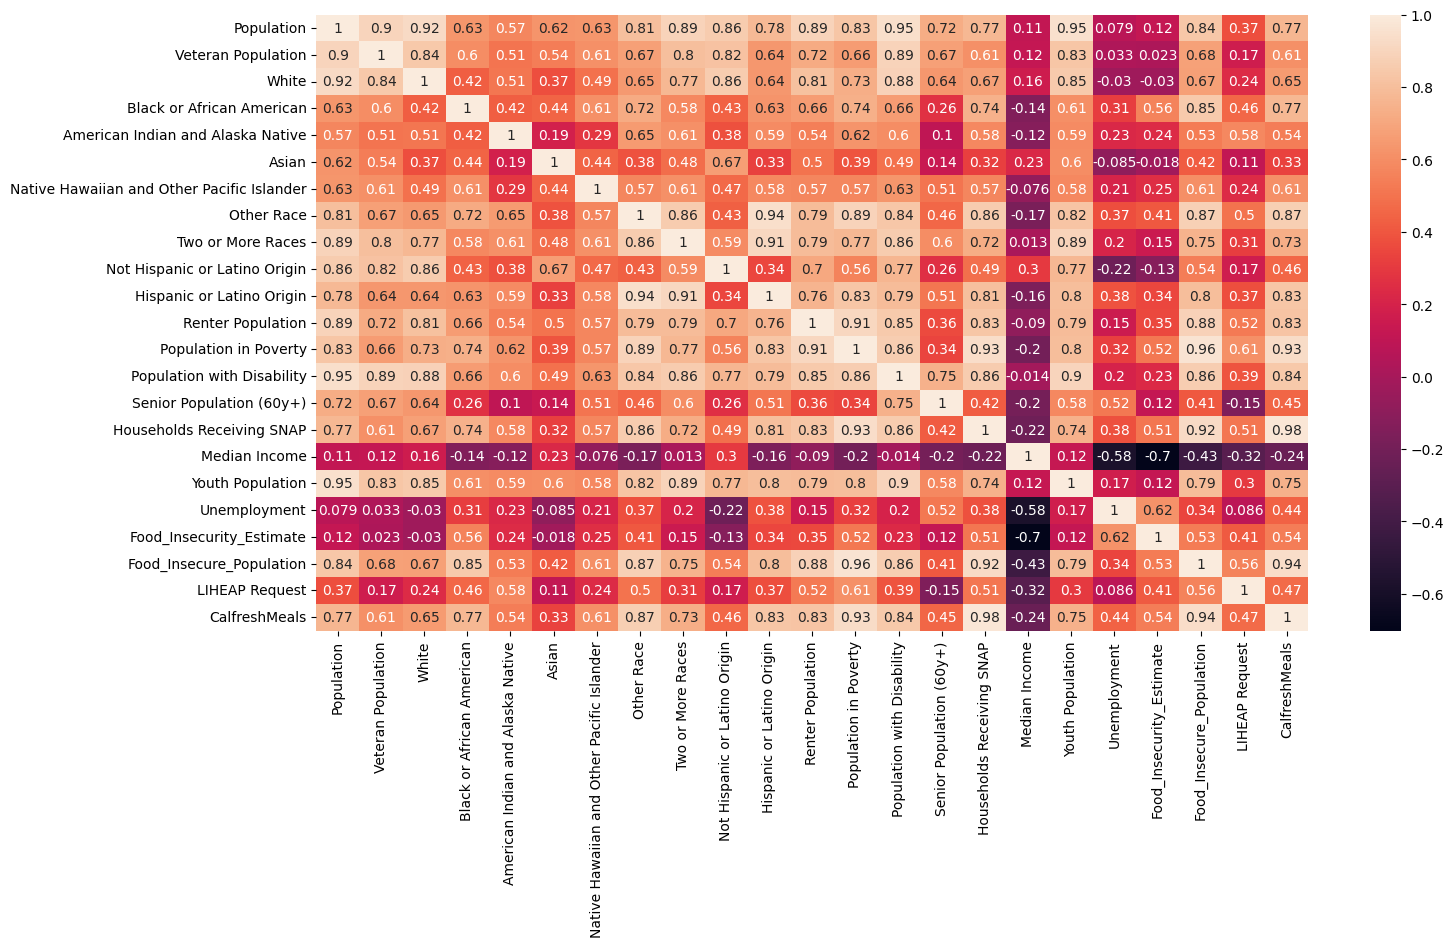

In [ ]:
# Computing the correlation between the features
# showing the heatmap of the pairwise correlation
plt.rcParams["figure.figsize"] = (16,8)
sns.heatmap(Merged_df[:][list(Merged_df.columns)[2:]].corr(), annot = True)

# Unemployment rate vs total meals - Highest populated

In [ ]:
# mapper from the month to dates
Months_names = {'Jan' : '1/1/',
                'Feb' : '2/1/',
                'Mar' : '3/1/',
                'Apr' : '4/1/',
                'May' : '5/1/',
                'Jun' : '6/1/',
                'Jul' : '7/1/',
                'Aug' : '8/1/',
                'Sep' : '9/1/',
                'Oct' : '10/1/',
                'Nov' : '11/1/',
                'Dec' : '12/1/'}

def Data_convert(date):

  if 'Covid' in date:
    return date

  # Taking out the year and month
  year, month = list(date.split('-'))

  return Months_names[month] + '20' + year

Converting the date

In [ ]:
# Dropping the estimate column
Unemployment_df = unemployment_wide_df.drop('County (EDD Estimates)', axis = 1)
Unemployment_df.columns = list(map(lambda x: x.split('_')[0], list(Unemployment_df.columns)))
Unemployment_df['Date'] = Unemployment_df['Date'].apply(func = Data_convert)
Unemployment_df

,Date,91901,91902,91905,91906,91910,91911,91913,91914,91915,...,92124,92126,92127,92128,92129,92130,92131,92139,92154,92173
0,Pre-Covid,2.079602,3.201709,3.213715,5.670375,4.281131,5.198517,3.682860,1.914614,2.698921,...,2.796819,2.537381,1.729272,2.631431,2.507817,2.695010,2.243566,4.523580,4.596349,6.334217
1,3/1/2020,3.534753,4.674549,4.696440,7.112666,5.833214,6.806865,5.111398,3.324868,4.128999,...,4.189319,3.949295,3.009461,3.942289,3.806004,4.004637,3.549987,6.072737,6.230156,8.054353
2,4/1/2020,14.778581,15.515390,17.697817,18.234205,17.559023,18.806985,15.410636,14.221384,14.785346,...,13.790731,12.944117,10.919718,12.139797,12.095743,11.949238,11.411132,17.811213,18.358662,20.490724
3,5/1/2020,15.208682,16.111880,18.153816,18.878790,17.989595,19.081145,16.043443,14.954966,15.457895,...,14.643730,13.583853,11.954178,13.084871,13.129773,13.019559,12.422611,18.155228,18.521813,20.499978
4,6/1/2020,12.556023,13.532897,14.778134,16.253584,15.004931,15.925722,13.561979,12.388346,12.909802,...,12.625994,11.728084,10.576738,11.543411,11.604651,11.678353,11.054105,15.145338,15.301940,17.082548
5,7/1/2020,11.773957,12.805785,13.632647,15.362776,14.070964,14.827660,12.737206,11.711740,12.184819,...,11.876204,10.674619,9.874354,10.849742,10.988606,10.893781,10.324031,14.031589,14.126239,15.687446
6,8/1/2020,9.809887,10.554491,11.950937,13.640532,11.885804,12.689460,10.437613,9.424307,9.858413,...,9.695123,8.558209,7.708605,8.672446,8.793635,8.786944,8.130132,11.899254,11.977729,13.623478
7,9/1/2020,8.686312,9.426426,10.749148,12.445125,10.730306,11.556548,9.343961,8.249795,8.724730,...,8.631926,7.650883,6.810982,7.766412,7.831275,7.895588,7.226592,10.759668,10.873631,12.552757
8,10/1/2020,7.526266,8.299917,9.655413,11.304038,9.624278,10.487391,8.321571,7.105566,7.646410,...,7.519162,6.698808,5.792867,6.740465,6.780199,6.819546,6.184099,9.749731,9.824695,11.526958
9,11/1/2020,7.161965,7.960996,9.304815,10.905100,9.241453,10.087736,7.967078,6.720525,7.291580,...,7.220323,6.496126,5.574156,6.496197,6.520066,6.581728,5.937061,9.420423,9.436894,11.102196


Comparsion between the unemployment rate and the number of rate of number of meals for the 5 highest populated zipcodes

In [ ]:
# Taking out the zipcodes of the first 5
ZipCodes = Top_10_populated['ZipCode'].unique()

# Forming the subplot
fig = make_subplots(rows=2, cols=5, shared_yaxes=True, subplot_titles = list(map(str, ZipCodes)))

# for first 10 zipcodes
for index in range(len(ZipCodes)):


  scaler = MinMaxScaler()
  unemployment_temp = Unemployment_df[['Date', str(ZipCodes[index])]].copy()
  unemployment_temp[str(ZipCodes[index])] = scaler.fit_transform(np.array(unemployment_temp[str(ZipCodes[index])]).reshape(-1, 1))

  scaler = MinMaxScaler()
  meals_temp = Top_10_populated[Top_10_populated['ZipCode'] == ZipCodes[index]].copy()
  meals_temp['CalfreshMeals'] = scaler.fit_transform(np.array(meals_temp['CalfreshMeals']).reshape(-1, 1))


  # filter out their records, make a plot based on those records
  # add the plot to the subplot
  fig.add_trace(plot_function(meals_temp, 'Date', 'CalfreshMeals', f'{ZipCodes[index]}_meals'), row = index//5 + 1, col = index%5 + 1)
  fig.add_trace(plot_function(unemployment_temp[1:], 'Date' , str(ZipCodes[index]), f'{ZipCodes[index]}_unemp'), row = index//5 + 1, col = index%5 + 1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    title_text="Total meals vs unemployment rate - Highest populated"
)

# Show the final result
fig.show()

# Unemployment rate vs total meals - Lowest populated

Comparsion between the unemployment rate and the number of rate of number of meals for the 5 lowest populated zipcodes

1/1/2020 -> Jan-2020
2/1/2020 -> Feb-2020

In [ ]:
# mapper from the month to dates
Months_names = {1 : 'Jan',
                2 : 'Feb',
                3 : 'Mar',
                4 : 'Apr',
                5 : 'May',
                6 : 'Jun',
                7 : 'Jul',
                8 : 'Aug' ,
                9 : 'Sep' ,
                10 : 'Oct',
                11 : 'Nov',
                12 : 'Dec' }

def Data_convert(date):

  if 'Covid' in date:
    return date

  # Taking out the year and month
  year, month = list(date.split('-'))

  return Months_names[month] + '20' + year

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Taking out the zipcodes of the first 5
ZipCodes = Lowest_10_populated['ZipCode'].unique()

# Forming the subplot
fig = make_subplots(rows=2, cols=5, shared_yaxes=True, subplot_titles = list(map(str, ZipCodes)))

# for first 5 zipcodes
for index in range(len(ZipCodes)):

  if str(ZipCodes[index]) in Unemployment_df.columns:
    scaler = MinMaxScaler()
    unemployment_temp = Unemployment_df[['Date', str(ZipCodes[index])]].copy()
    unemployment_temp[str(ZipCodes[index])] = scaler.fit_transform(np.array(unemployment_temp[str(ZipCodes[index])]).reshape(-1, 1))

  scaler = MinMaxScaler()
  meals_temp = Lowest_10_populated[Lowest_10_populated['ZipCode'] == ZipCodes[index]].copy()
  meals_temp['CalfreshMeals'] = scaler.fit_transform(np.array(meals_temp['CalfreshMeals']).reshape(-1, 1))


  # filter out their records, make a plot based on those records
  # add the plot to the subplot

  fig.add_trace(plot_function(meals_temp, 'Date', 'CalfreshMeals', f'{ZipCodes[index]}_meals'), row = index//5 + 1, col = index%5 + 1)
  if str(ZipCodes[index]) in Unemployment_df.columns:
    fig.add_trace(plot_function(unemployment_temp[1:], 'Date' , str(ZipCodes[index]), f'{ZipCodes[index]}_unemp'), row = index//5 + 1, col = index%5 + 1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    title_text="Total meals vs unemployment rate - Lowest populated"
)

# Show the final result
fig.show()

# House price trend

In [ ]:
# Create a line plot with two lines
fig = go.Figure()

# Add the first line
fig.add_trace(go.Scatter(x = zillow_rent_df['Date'] ,y = zillow_rent_df['Rent Prices'], name='House price'))

# Update layout with title and axis labels
fig.update_layout(title='House price trend', xaxis_title='Date', yaxis_title='Price')

# Show the plot
fig.show()

# Estimating Median income

In this section, we are going to train a regression model in order to estimate the median income of the zipcodes based on the data at hand.

In [ ]:
# Taking a copy from the original data
Training_data = acs_df.copy()

## Missing values

In [ ]:
# Checking the percentage of null values in the columns
(Training_data.isnull().sum() / Training_data.shape[0]).round(2)

Year                                          0.00
Zip Code                                      0.00
Population                                    0.00
Veteran Population                            0.00
White                                         0.00
Black or African American                     0.00
American Indian and Alaska Native             0.00
Asian                                         0.00
Native Hawaiian and Other Pacific Islander    0.00
Other Race                                    0.00
Two or More Races                             0.00
Not Hispanic or Latino Origin                 0.00
Hispanic or Latino Origin                     0.00
Renter Population                             0.00
Population in Poverty                         0.00
Population with Disability                    0.00
Senior Population (60y+)                      0.62
Households Receiving SNAP                     0.00
Median Income                                 0.00
Youth Population               

As we can see above, most of the values for the feature __'Senior Population (60y+)'__ are null values. Then we will __drop__ this feature from our data.

For the <ins>other features</ins> that we containing null values, we will __impute__ them using the average values for those features accross the data.

In [ ]:
# Dropping the feature which containg a lot of null values
Training_data.drop('Senior Population (60y+)', axis = 1, inplace = True)

We will impute the features that they have less null values

In [ ]:
# Identifying the columns that need to be imputed
cols_to_impute = ['LIHEAP Request', 'Food_Insecure_Population', 'Food_Insecurity_Estimate', 'Unemployment']

# Making an imputer object
imp = SimpleImputer(missing_values=np.nan, strategy="mean")

# Imputing the values
imputed_temp = imp.fit_transform(Training_data[cols_to_impute])

# Putting the imputed values into the dataframe
Training_data[cols_to_impute] = imputed_temp

Now we will check again the null values in the dataframe

In [ ]:
Training_data.isnull().sum()

Year                                          0
Zip Code                                      0
Population                                    0
Veteran Population                            0
White                                         0
Black or African American                     0
American Indian and Alaska Native             0
Asian                                         0
Native Hawaiian and Other Pacific Islander    0
Other Race                                    0
Two or More Races                             0
Not Hispanic or Latino Origin                 0
Hispanic or Latino Origin                     0
Renter Population                             0
Population in Poverty                         0
Population with Disability                    0
Households Receiving SNAP                     0
Median Income                                 0
Youth Population                              0
Unemployment                                  0
Food_Insecurity_Estimate                

From the output above, we can confirm that there is no missing values in our data

## Data distribution

In this section we will check what is the data distribution of the columns in our data.

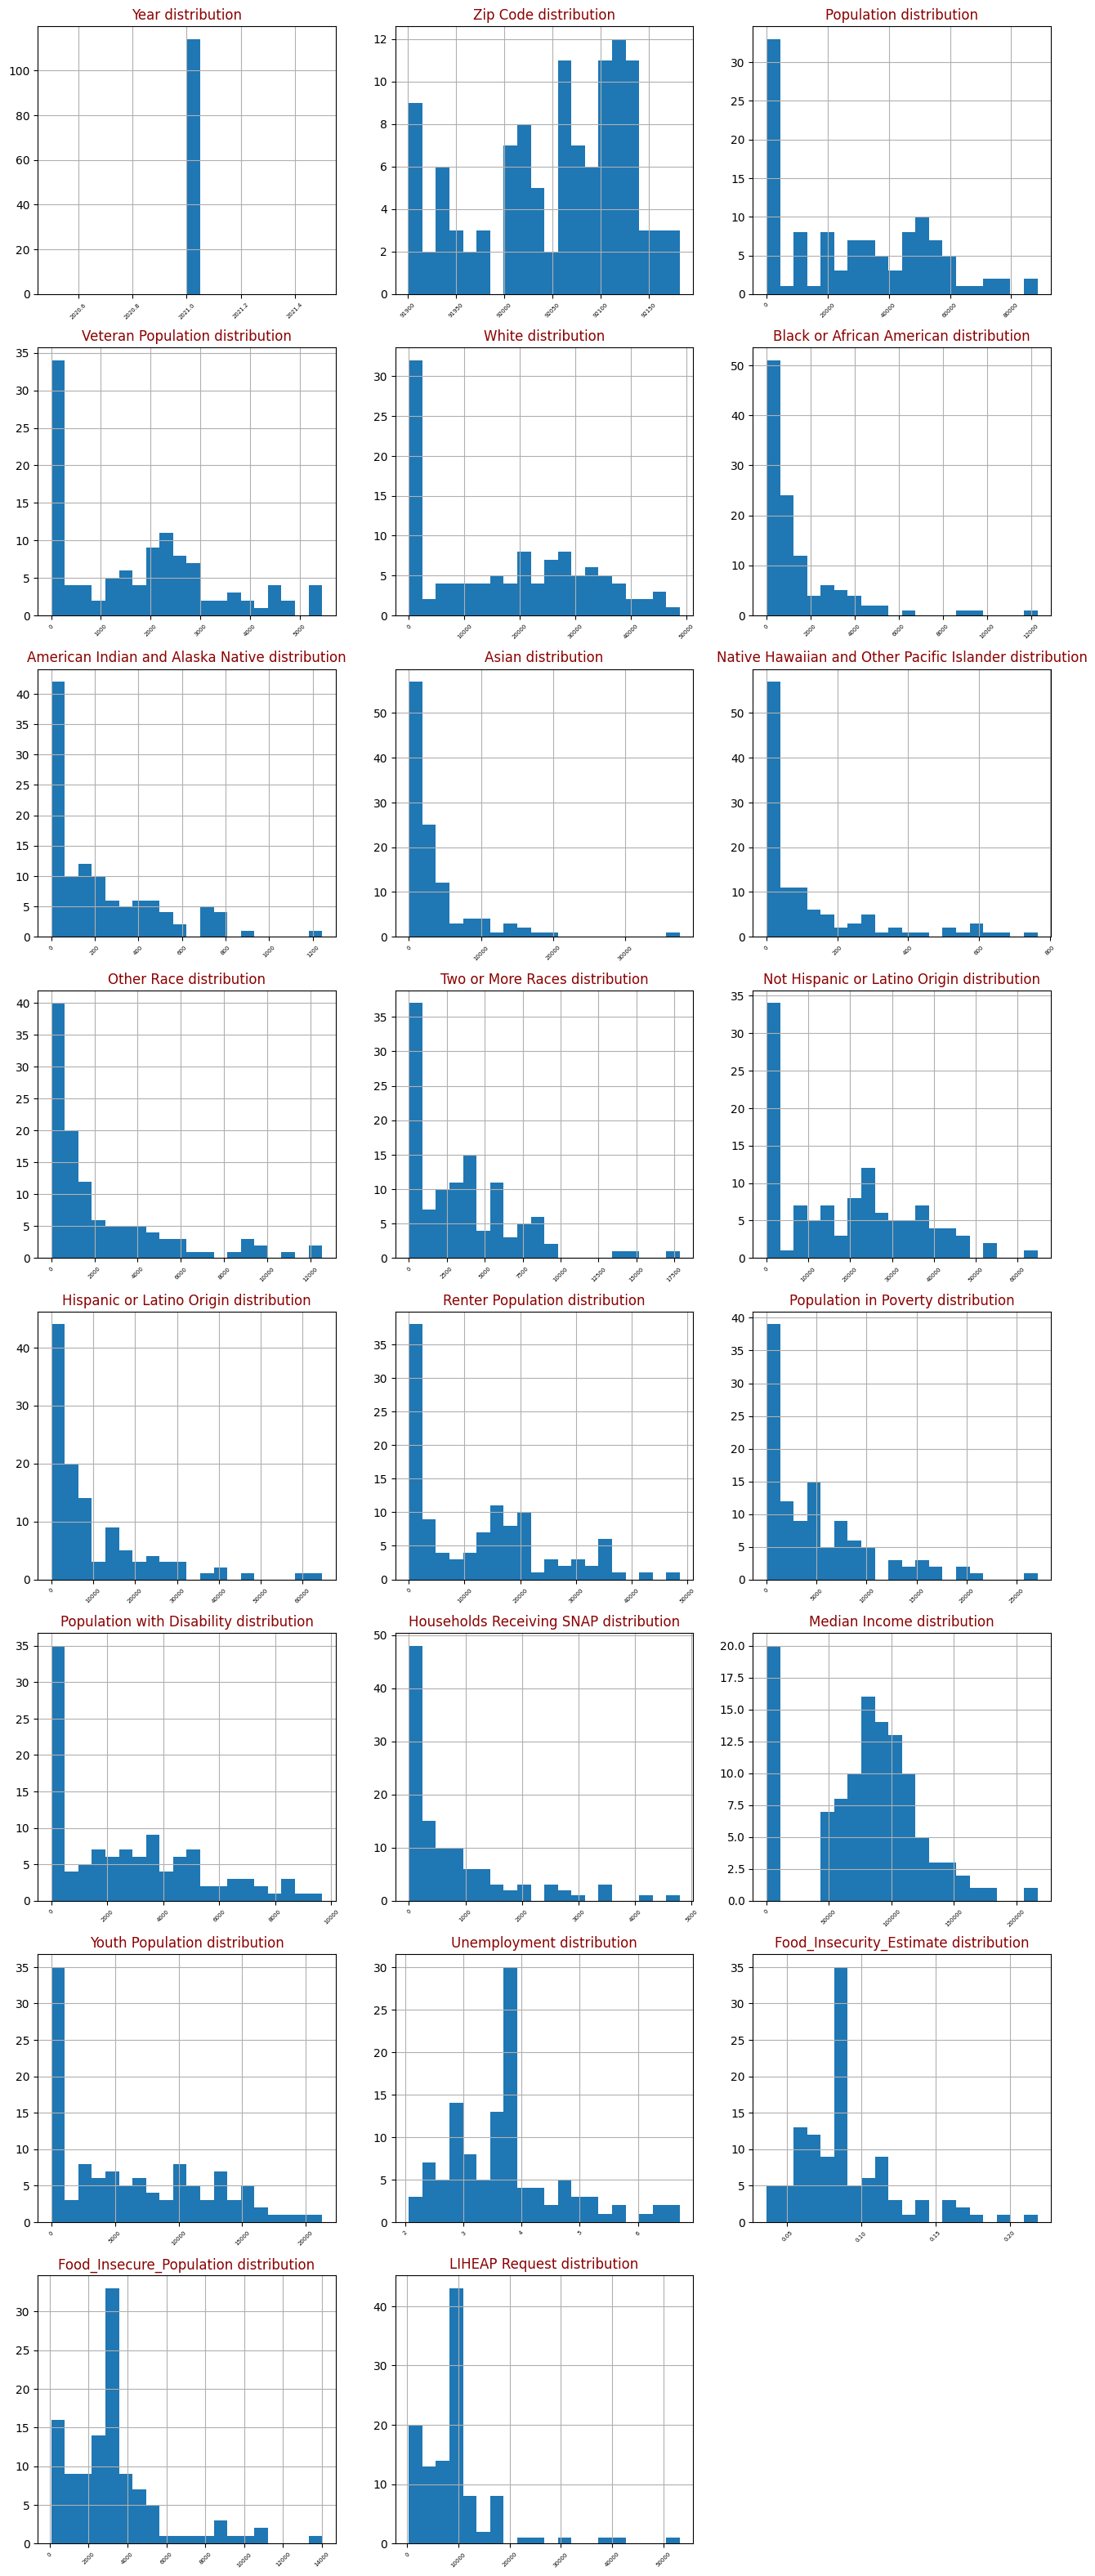

In [ ]:
# Making our figure
fig=plt.figure(figsize=(16,40))

# For each column that we have in the data, we want to plot its distribution
for index, column in enumerate(Training_data.columns):
    ax=fig.add_subplot(8,3,index+1)
    Training_data[column].hist(bins= 20, ax = ax)
    plt.xticks(rotation = 45, fontsize = 5)
    ax.set_title(column + " distribution",color='darkred')

1. Checking the distribution of the data, we can conclude that we are able to drop the 'Year' column as it has only 1 value for all of the records.

2. The Zip Code column can be dropped as it is different for all of the records. In this case this feature won't give us any predictive power.



In [ ]:
# Dropping the year and ZipCodes
Training_data.drop(['Year', 'Zip Code'], axis = 1, inplace = True)

## Data splitting

In our work we are going to predict the __median income__. So we are going to split the features from our target.

In [ ]:
# Features
Features_col = list(Training_data.columns)
Features_col.remove('Median Income')

# Separating the features and the target
X, y = Training_data[Features_col], Training_data['Median Income']

Then we are ready to split our data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
# at random 80% in training set, 20% in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Linear Regression fit

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, explained_variance_score

# Fitting the linear regression model
Linear_reg = LinearRegression().fit(X_train, y_train)

# Get the score of the model over the test set
print('Score on the training set: ', Linear_reg.score(X_train, y_train))
print('Score on the test set: ', Linear_reg.score(X_test, y_test))

# Get the predictions for the test set
y_pred = Linear_reg.predict(X_test)

print('MSE: ', mean_squared_log_error(y_test, y_pred))
print('EVS: ',  explained_variance_score(y_test, y_pred))

Score on the training set:  0.7052723770856987
Score on the test set:  0.6072314918462232
MSE:  26.761384325130837
EVS:  0.6207518741470068


We can see above the model shows a better prediction performance on the training set.

## Decision tree regressor fit

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fitting the decision tree regressor model
DT_regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

# Get the score of the model over the test set
print('Score on the training set: ', DT_regressor.score(X_train, y_train))
print('Score on the test set: ', DT_regressor.score(X_test, y_test))

# Get the predictions for the test set
y_pred = DT_regressor.predict(X_test)

print('MSE: ', mean_squared_log_error(y_test, y_pred))
print('EVS: ',  explained_variance_score(y_test, y_pred))

Score on the training set:  1.0
Score on the test set:  0.684743604455172
MSE:  6.992715019175317
EVS:  0.6905923241851467


We can see above that the model prediction of the decision tree is much better with respect to Linear Regression, but the problem is that we have have overfitted the training model and we are not getting the same level of prediction in test set.

So we are going to __fine tune the hyper parameters__ both for Linear Regression and Decision Tree Regressor and compare the results.

## Decision tree regressor - Hyperparameter tuning

We will train different Decision Tree Regressor models by setting the hyperparmeters to different values. We can find the adjustable hyperparameters of the Decision Tree Regressor [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [ ]:
# Helps us to training different models by using different
# combination of hyperparameters
from sklearn.model_selection import GridSearchCV

# Creating a decision tree algorithm
clf = DecisionTreeRegressor(random_state=0)

# Different hyperparameters
params = {
   'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
   'splitter': ['best', 'random'],
   'max_depth': [5, 10, 20],
   'min_samples_split':[2, 5, 10],}

# Having our grid search ready
hp_tuning = GridSearchCV(clf, params, scoring='neg_mean_squared_error',cv = 5)

# Performing the hyperparameters tuning
hp_tuning.fit(X_train, y_train)

# Getting the best accuracy of the model over the cross validation process
print("Best parameter (CV score=%0.3f):" % hp_tuning.best_score_)

# Getting the parameters of the best model
print(hp_tuning.best_params_)

Best parameter (CV score=-638756008.723):
{'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 10, 'splitter': 'best'}


In [ ]:
# Getting the predictions of the model over the training set
y_pred = hp_tuning.best_estimator_.predict(X_test)
print('Score on the training data (tuned model): ', hp_tuning.best_estimator_.score(X_train, y_train))
print('Score on the test data (tuned model): ', hp_tuning.best_estimator_.score(X_test, y_test))

print('Tuned MSE: ', mean_squared_log_error(y_test, y_pred))
print('Tuned EVS: ',  explained_variance_score(y_test, y_pred))

Score on the training data (tuned model):  0.9283793100077775
Score on the test data (tuned model):  0.6440875775594481
Tuned MSE:  7.074991761627324
Tuned EVS:  0.6444424552736361


Out of the different settings that we had, our best model was generated by using the __Decision Tree Regressor__ using its <ins>default hyperparameters</ins> which gave us the highest score of __'0.68'__ and lowest __Mean Squared Error__ of __'6.99'__ .

This can be due to the fact that we don't have enough data at hand in order to check the real predictive performance of the models.